# Introduction to Spectral Analysis

## Tools for Modern Macroeconometrics

## Lecture 3
----------------------------------------------


## Time versus Frequency

* So far we have viewed a time series as a time indexed sequence of random variables, for example AR amd MA models. We call this approach as time series analysis in the **time domain**. 

* There is also an equivalent perspective which views a time series as overlayed waves of different frequencies. This view point is termed in time series analysis as the analysis in the **frequency domain**.

* The decomposition of a time series into sinusoids of different frequencies is called the **spectral representation**. 

* The estimation of the importance of the waves at particular frequencies is referred to as **spectral or spectrum estimation**. See Granger (1964, 1966). For detailed technical treatememnt see Priestley (1981).

* Example: A causal AR, MA or ARMA process $X_t$ may be regarded as filtered white-noise process with filter weights $\theta_1, \theta_2, ...$.

* From a statistical and mathematical point of view, the equivalence between time and frequency domain analysis rest on the theory of **Fourier series**.

## Motivation

In [33]:
library(ggplot2); 
library(reshape2); 
library(fracdiff);
set.seed(1234)
#options(repr.plot.height=6)
options(repr.plot.width=9, repr.plot.height=6)
#install.packages("reshape2")

In [47]:
# This is differently defined Fourier transform. But dont worry it is here just to show you that you can have it this way.
# Normalized FFT by 1/sqrt(T)
# For this type of Fourier transform the Percival's theorem holds
fftG <- function(y){
  T <- length(y)
  G <- 1/sqrt(T) * fft(y)
  return(G)
}
# Inverse FFT to Normalized FFT by 1/sqrt(T)
ifftG <- function(G){
  T <- length(G)
  y <- 1/sqrt(T) * fft(G, inverse=TRUE)
  return(Re(y))
}
##########################
# Sample spectral density
##########################
# I = abs(fft(x)/sqrt(T))^2 # Periodogram, division by sqrt(T) is done in FFTG
# RealSpecDens <- function(x){
#   T <- length(x)
#   Ft <- fftG(x)
#   w <- 2*pi * seq(0,T-1) / T
# #   Iw <- Re(Ft*Conj(Ft))[1:ceiling(T/2)]
#   Iw <- abs(Ft)^2  # Fast Fourier transform of x, squard and averaged
#   Sw <- data.frame(w = w[1:ceiling(T/2)], Iw = Iw[1:ceiling(T/2)])
#   return(Sw)
# }

# Plotting function, line-point plot, not finished
lolliplot <- function(x, y=NULL, co = "black", name="Plot", nameY="y") {
  plot(x, y, type = "h", col=co, xlab=NULL, ylab=nameY, main=name)
  abline(h=0, col="DarkGrey")
  points(x, y, pch=16, col=co)
}
# AR(1) process # mean is 0
ARone <- function(T, beta, mu=0) {
  epsilons <- rnorm(T)     # N(0,1) by default
  y <- rep(0, T)
  for (i in 2:T) {
    y[i] <- mu + beta*y[i-1] + epsilons[i]
  } 
  return(y)
}
# MA(1) process
MAone <- function(T, theta, mu=0) {
  epsilons <- rnorm(T)     # N(0,1) by default
  y <- rep(0, T)
  for (i in 2:T) {
    y[i] <- mu + theta*epsilons[i-1] + epsilons[i]
  } 
  return(y)
}

# same function as in help to fft() and its slow function fft0() 
# - just does not use vapply function to see it in for loop
# in fft0(): vapply is a function similar to sapply but return prespecified value
fft1 <- function(z, inverse=FALSE) {
  n <- length(z)
  if(n == 0) return(z)
  k <- 0:(n-1)
  ff <- (if(inverse) 1 else -1) * 2*pi * 1i * k/n # frequencies shifted by one to 0
  ft <- c() # place to save value of transform for given frequencies
  for (h in 1:n) {
    ft = c(ft, sum(z * exp(ff * (h-1)))) # append value
  }
  if (inverse) return(ft/n) else return(ft) # updated and having inverse divided by n
}
         
         # defining the periodogram
periodogram_x <- function(x) {
    n <- length(x)
    f0 <- (abs(fft1(x))^2) / length(x)  # fourier transform and normalize: 1/N |x_w|^2
    is.even <- function(x){ x %% 2 == 0 } # define even function (not in R)
    n_taken <- if (is.even(n)) round(n / 2  + 1) else ceiling(n/ 2)
    f0[1:n_taken]
}
# defining frequency function to label it
frequency_pi <- function(x) {(pi* seq(0, length(x)-1) / length(x))}

# easy plot
plot_periodogram_x <- function(x) {
    plot(x=frequency_pi(periodogram_x(x)), y=periodogram_x(x), xlab="Frequency", ylab="I_w", col="steelblue", lwd=2, cex = 1.2,)
}

#### Correlation of two time series I

In [31]:
x0 <- rnorm(1000)
x1 <- x0[1:999]
x2 <- x0[2:1000]

cor(x1, x2)

[1] 0.02615475

#### Is the correlation the same for all horizons? (frequencies, periods?)

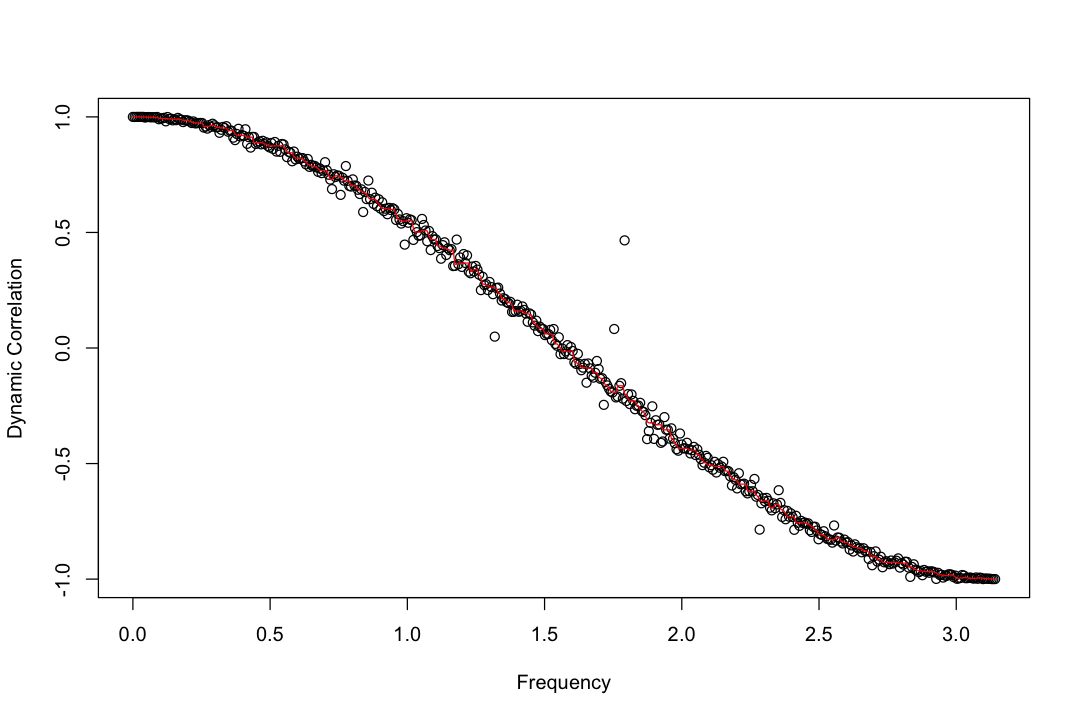

In [34]:
f1 <- fft(x1)
f2 <- fft(x2)
dc1 <- (Re(f1 * Conj(f2)) / (abs(f1) * abs(f2)))[1:499]

plot(x = seq(0, pi, length.out = 499), y = dc1, ylab = "Dynamic Correlation", xlab = "Frequency")
lines(x = seq(0, pi, length.out = 499), y = smooth(dc1), col = "red")

---------------------------------------
#### Correlation of two time series II

In [35]:
x0 <- rnorm(1000)
x1 <- x0[1:998]
x2 <- x0[3:1000]

cor(x1, x2)

[1] -0.03030294

#### Is the correlation the same for all horizons? (frequencies, periods?)

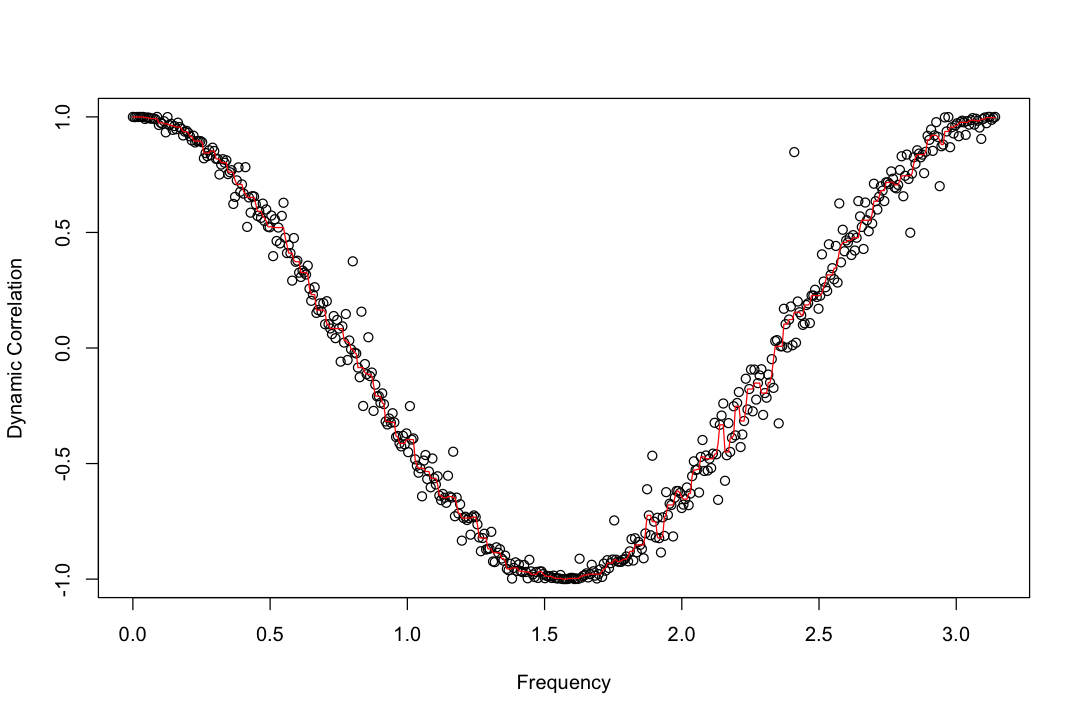

In [36]:
f1 <- fft(x1)
f2 <- fft(x2)
dc1 <- (Re(f1 * Conj(f2)) / (abs(f1) * abs(f2)))[1:499]

plot(x = seq(0, pi, length.out = 499), y = dc1, ylab = "Dynamic Correlation", xlab = "Frequency")
lines(x = seq(0, pi, length.out = 499), y = smooth(dc1), col = "red")

## Basics - complex numbers, frequency, period, amplitude

#### Complex Numbers

Complex numbers, composed from real and imaginary part:

$$ z = A + Bi $$
where $i=(-1)^{1/2}$.

Euler's formula
$$ e^{i \theta} = \cos \theta + i \sin \theta. $$
Example: Euler's identity when $\theta = \pi$.

We can move the the polar notation:
$$ z = A + Bi = C e^{i \theta}, \text{where } C = \sqrt{(A^2 + B^2)}$$
$C$ is the amplitude, and $\theta =  tan^{-1}(B/A)$ is the phase.

Complex conjugate of a complex number is
$$ (A + Bi)^* = A - Bi, \text{ and } (Ce^{i \theta})^* = Ce^{-i \theta} $$
<!-- ![image](cochranecomplex.png) -->

#### Examples: How to look at a periodic signal
For a sine function
$$ y_t = A \sin (\omega t + \theta), \text{ where } t = 1,\dots $$

* (angular) frequency, $\omega$
$$T = \frac{2 \pi}{ \omega};$$
* the period, $T$, is amount of time it takes a whole cycle;
* phase is the angular amount $\theta$ by which sine wave is shifted;
* and $A$ is the amplitude.

In [30]:
## setup of plots in jupyter
options(repr.plot.width=9, repr.plot.height=6)
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))
# options(repr.plot.height = 5.5, repr.plot.width=4,
#         # better resolution in jupyter
#         repr.plot.res = 120, 
#         repr.plot.quality = 200,
#         repr.plot.family = 'sans')

### Frequency and period

Angular frequency $\omega$ describes the angular displacement of the body per unit of time. In a relationship, the frequency $f$ describes the number of oscillations of the body per unit of time
$$\omega = 2\pi f$$
for a (discrete) finite time series of length $N$
$$\omega(k) = \frac{2\pi k}{N}$$

The time period $T$ is the quantity of oscillating body that shows the total time used by the body to achieve one oscillation
$$T = \frac{1}{f}$$

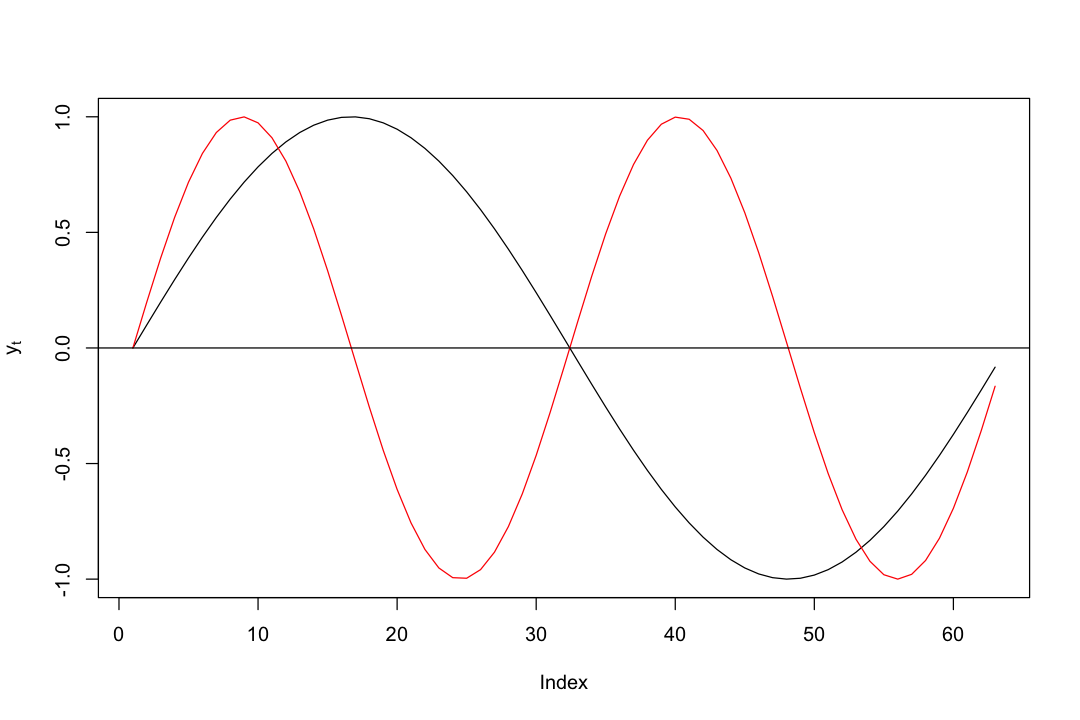

In [37]:
t <- seq(0, 2*pi, .1)
w <- 2
y0 <- sin(w*t)
y1 <- sin(w*t*1/2)
plot(y1, type ="l", ylab=expression(y[t]))
lines(y0, col="red")
abline(h=0)

### Amplitude and phase shift

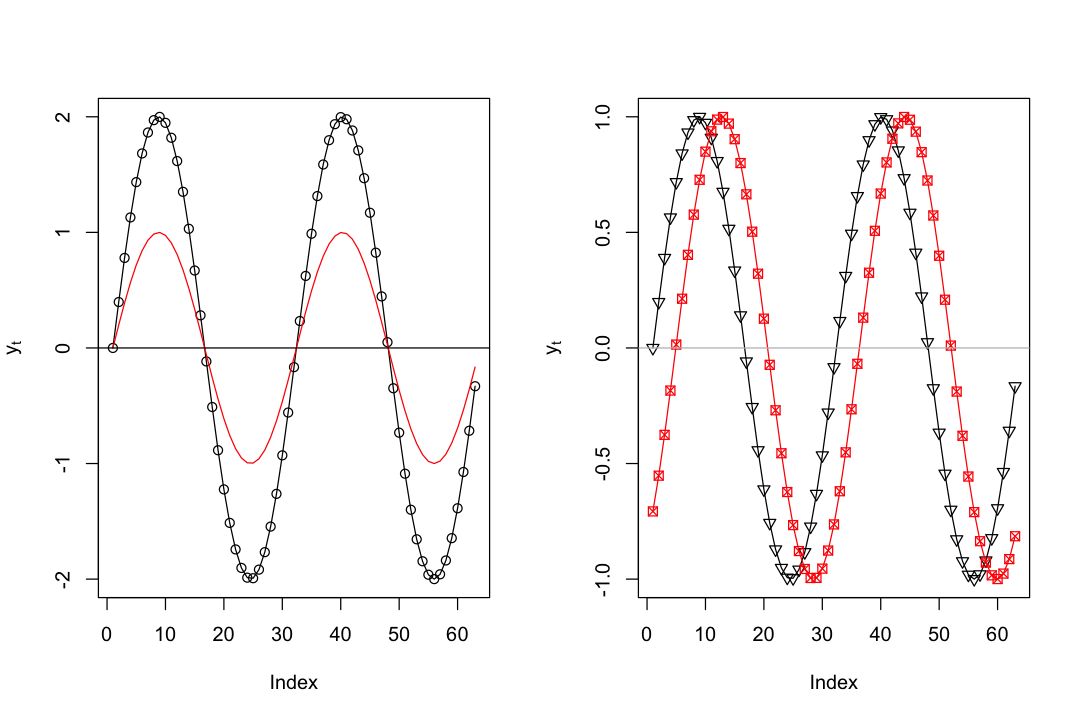

In [38]:
# Example of greater amplitude
par(mfrow=c(1, 2))
t <- seq(0, 2*pi, 0.1)
w <- 2
y0 <- sin(w*t)
y1 <- 2*sin(w*t)
plot(y1, type ="o", ylab=expression(y[t]))
lines(y0, col="red")
abline(h=0)

# Example of phase shift
y2 <- sin(w*t - pi/4)
plot(y0, type ="o", ylab=expression(y[t]), pch=25)
lines(y2, col="red", type="o", pch=7)
abline(h=0, col="grey")

## Fourier transform

<!-- # ## Fourier transforms

# **Motivation and examples:** papers, studies, filters, etc.

#   - Hodrick-Prescott filter
#   - Lo & Chaduri (2016):  Spectral portfolio theory -->

We define Fourier transform for any series of numbers $\{x(t)\}$ as

$$ X(\omega) = \frac{1}{2 \pi}\int_{t=-\infty}^{\infty} e^{-i\omega t} x(t) dt ,$$ which is a complex-valued function of frequency. Having FT of $x_t$, we can reconstruct it back using Inverse Fourier transform

$$ x(t) = \int_{-\pi}^{\pi} e^{i\omega t} X(\omega) d \omega .$$

### Discrete version - finite time series
Discrete Fourier Transform of a **finite** sequence $\{x(t)\}$, real or complex, is defined as
<!-- $$ X(k) = \frac{1}{N}\sum_{t=0}^{N-1} x(t) e^{-i\omega k\frac{t}{N}} , ~~ k = 1,2, ...,N/2$$ -->

$$ X(\omega_k) =  \frac{1}{N}\sum_{t=0}^{N-1} x(t) e^{-i t \omega_k} , ~~~~ \omega_k = \frac{2 \pi k}{N}, ~~~~ k = 1,2 ...,\frac{N}{2}$$

We can reconstruct $\{x(t)\}$ using Inverse Discrete Fourier Transform given by

$$ x(t) =  \sum_{k=0}^{N-1} X(k) e^{i t \omega_k}  ~~~~ t=0,...,N-1.$$



The Parseval's theorem for finite sequences
$$ \sum_{t=0}^{N-1} |x(t)|^2  = \frac{1}{N} \sum_{k=0}^{N-1} |X(\omega_k)|^2,$$
#### Example:

In [41]:
wn <- rnorm(1000)
Gw <- fftG(wn)
sum(abs(Gw)^2) # Are they equal?
sum(wn^2);
# It holds!!!
var(wn)*999

[1] 964.9459

[1] 964.9459

[1] 964.9356

### How Does the Fourier transform Work

Fourier transform uses complex exponentials (sinusoid) as building blocks. For each frequency of complex exponential, the sinusoid at that frequency is compared to the signal. If the signal consists of that frequency, the correlation is high $\rightarrow$ large FT coefficients. If the signal does not have any spectral component at a frequency, the correlation at that frequency is low / zero, $\rightarrow$ small / zero FT coefficient.

Nice colorful representation (by Stuart Riffle)

$$ \LARGE{\color{violet}{X}}_{\color{green}{k}} = {\color{magenta}{\frac{1}{N}\sum_{t=0}^{N-1}}} {\color{blue}{x_t}} {\color{red}{e^{-i {\color{orange}{2\pi}} {\color{green}{k}}  {\color{magenta}{\frac{t}{N}}} }}   }$$
To find ${\color{violet}{\text{the variance at}}}$ ${\color{green}{\text{a particular frequency}}}$ ${\color{red}{\text{spin}}}$ ${\color{blue}{\text{time series}}}$ ${\color{orange}{\text{around a circle}}}$ ${\color{green}{\text{at that frequency}}}$ and ${\color{magenta}{\text{average a bunch of points along that path}}}$.


### Example: Sin function - one period
Sin function with frequency 1Hz, Sampling 8Hz, Amplitude = 1
N is a number of samples (observations) = 8
k is a "frequency bin"
The frequency is $f = \frac{k}{N}$, or $\omega_k = 2\pi f$

0+0i
0-4.0000006188979i
0+0i
4.44089e-16-6.18897904480775e-07i
0+0i
0+6.18897904480775e-07i
0+0i
0+4.0000006188979i


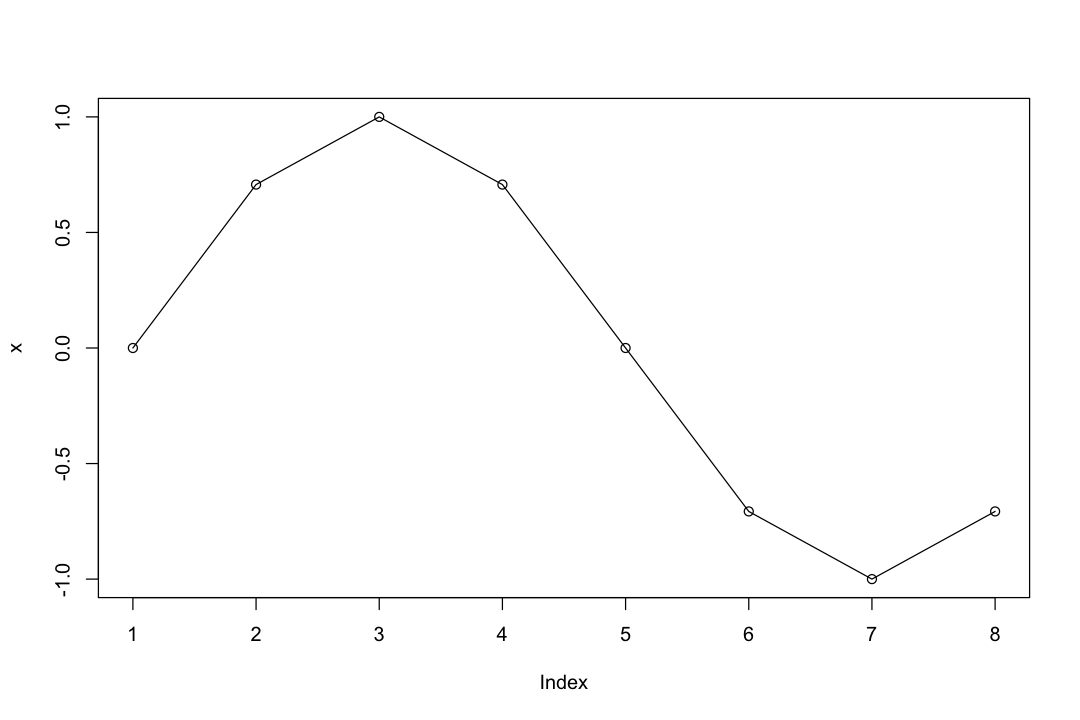

In [42]:
set.seed(12345)
x <-c(0, 0.707107, 1, 0.707107, 0, -0.707107, -1, -0.707107)
#fft(x)
cat(paste(fft(x)),sep="\n")
#cat(paste(abs(fft(x))^2),sep="\n")
#fft(fft(x), inverse = TRUE)/length(x)     # Inverse FFT
#Re(fft(fft(x), inverse = TRUE)/length(x)) # Real of IFFT
plot(x, type="o")

#### Results:
* We have frequencies from 0Hz to 7Hz
* Only for $k=1$ and $k=7$ we have non-zero values.
* The frequency of the function is 1Hz
* Nyquist frequency is 3Hz here - So we multiply the magnitude by $2$, we get $8$
* The amplitude is therefore $8/N = 1$
* Angle of the phase is $3\pi/2$, because the angle of the phase is based on the cosine wave 


## Sampling
Example of undersampled time series:

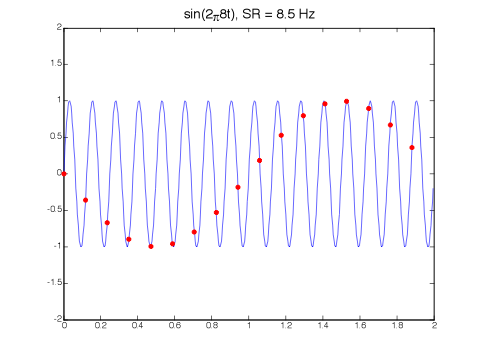

Nyquist frequency for discrete processes is $\frac{1}{2} f_s$, where $f_s$ is a sampling rate.

## Spectral Density
Suppose that $\{ {x_t}\}$ be a covarinace stationary process zero mean process with autocovariance function $\gamma_j$. The spectral density of $\{ {x_t}\}$ is the function $f(\cdot)$ defined by

$$ f(\omega) = \frac{1}{2\pi}\sum_{h=-\infty}^{\infty} \gamma(h) e^{-i \omega h} $$

where $e^{i \omega} = \cos \omega + i \sin \omega$ (Euler's formula). Since cos and sin have period $2\pi$, so also does $f$, and it suffices to limit our attention to the values of $f$ on the interval $(-\pi, \pi ]$.
The sine is an odd function whereas the cosine and the autocovariance function are even functions, hence the spectral density can be rewritten in a way:

\begin{align}
f(\omega) &= \frac{1}{2\pi}\sum_{h=-\infty}^{\infty} \gamma(h)(\cos(h\omega) + i \sin(h\omega)) \\
&= \frac{1}{2\pi}\sum_{h=-\infty}^{\infty} \gamma(h)\cos(h\omega) + 0 \\
&= \frac{\gamma(0)}{2\pi} + \frac{1}{2\pi} 2\sum_{h=1}^{\infty} \gamma(h)\cos(h\omega) \\
&= \frac{\gamma(0)}{2\pi} + \frac{1}{\pi} \sum_{h=1}^{\infty} \gamma(h)\cos(h\omega) \\
\end{align}

### Autocovariances

The autocovariance function can be reconstruct as the inverse Fourier transform of the  spectral density, i.e.
$$ \gamma(k) = \int_{-\pi}^{\pi} e^{i k \omega} f(\omega) d \omega = \int_{-\pi}^{\pi} \cos(k \omega) f(\omega) d \omega$$

For $k=0$, we get:
$$ \gamma(0) = \int_{-\pi}^{\pi} f(\omega) d \omega$$





## Convolution of infinite sequences
Suppose that $\{a_t\}$ and $\{b_t\}$ are two infinite sequences of real or complex-valued variables satisfying $\sum_{t=-\infty}^{\infty} |a_t|^2 < \infty$ and $\sum_{t=-\infty}^{\infty} |b_t|^2 < \infty$. Define the convolution of $\{a_t\}$ and $\{b_t\}$ as the infinite sequence whose t$th$ element is 
$$ a * b_t = \sum_{u=-\infty}^{\infty} a_u b_{t-u}, ~~~~ t = ...,-1,0,1,...,$$

<!--further we assume that $\sum_{t=-\infty}^{\infty} |a*b_t|^2 < \infty$, but doesn't have to be true in general.-->

where the asterisk $\ast$ is the commutatitve convolution operator.. Note that $b_t$ is reversed and shifted with respect to the first prior to the element by element multiplication.

**Ex.3:** If $\{a_t\}$ and $\{b_t\}$ have their Fourier transforms $A(\cdot)$ and $B(\cdot)$, respectively, then show that the DFT of the convolution $\{a*b_t\}$ is the function defined by $A(f)B(f)$. That is
$$ \sum_{t=-\infty}^{\infty} a*b_te^{-i\omega t} = A(f)B(f),~~~ |f| \leq 1/2$$

NOTE: 'The result' of the exercise is that **"convolution in the time domain is equivalent to multiplication in the frequency domain."**

-----
## ESTIMATION
we have two basic possibilities: **parametric** and **non-parametric**

Or we may start with the sample autocovarinace functions and then obtain the estimate of the sample spectral denstity.
Let's define autocovariance estimates as
$$ \hat{\gamma}(k) = \frac{1}{N} \sum_{t=k+1}^{N} (x(t) -\mu)(x(t-k) - \mu).$$ 
And now, we use FT to get the spectral density:
$$\hat{f}(\omega) = \sum_{k=-(N-1)}^{N-1} e^{-i \omega k} \hat{\gamma}(k).$$

### Non-parametric: Periodogram
Using the finite Fourier transform, we may estimate the sample spectral density using directly the Fourier transform of $x(t)$. Since $\lim_{N \to \infty} E(X(\omega) X(\omega)^*) = f(\omega)$, we can define the sample spectral density, periodogram, as
$$\hat{f}(\omega) = I(\omega) = X(\omega) X(\omega)^* = \frac{1}{N} \left( \sum_{t=1}^N e^{-i \omega t} x(t) \right) \left( \sum_{t=1}^N e^{i \omega t} x(t) \right) = \frac{1}{N} \left| \sum_{t=1}^N e^{-i \omega t} x(t) \right|^2.$$

In [ ]:
# defining the periodogram
periodogram_x <- function(x) {
    n <- length(x)
    f0 <- (abs(fft1(x))^2) / length(x)  # fourier transform and normalize: 1/N |x_w|^2
    is.even <- function(x){ x %% 2 == 0 } # define even function (not in R)
    n_taken <- if (is.even(n)) round(n / 2  + 1) else ceiling(n/ 2)
    f0[1:n_taken]
}
# defining frequency function to label it
frequency_pi <- function(x) {(pi* seq(0, length(x)-1) / length(x))}

# easy plot
plot_periodogram_x <- function(x) {
    plot(x=frequency_pi(periodogram_x(x)), y=periodogram_x(x), xlab="Frequency", ylab="I_w", col="steelblue", lwd=2, cex = 1.2,)
}
#plot_periodogram_x(sin(seq(1,100)/10))

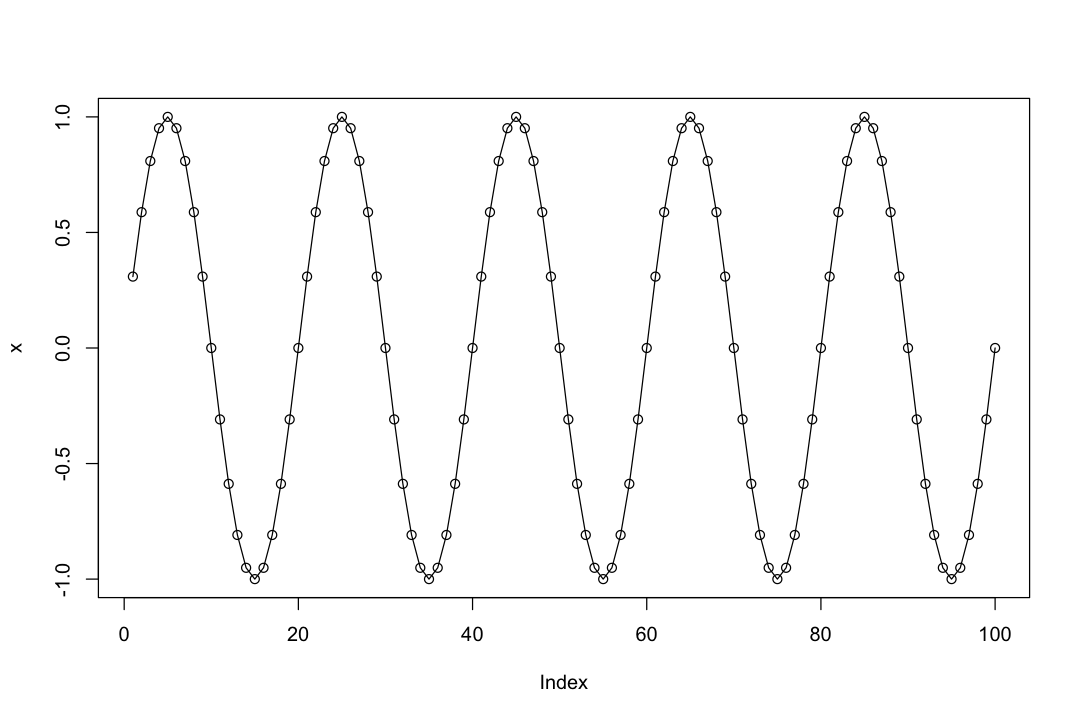

In [43]:
t = (seq(1,100)/20*2*pi)
x <- sin(t)
plot(x, type="o")

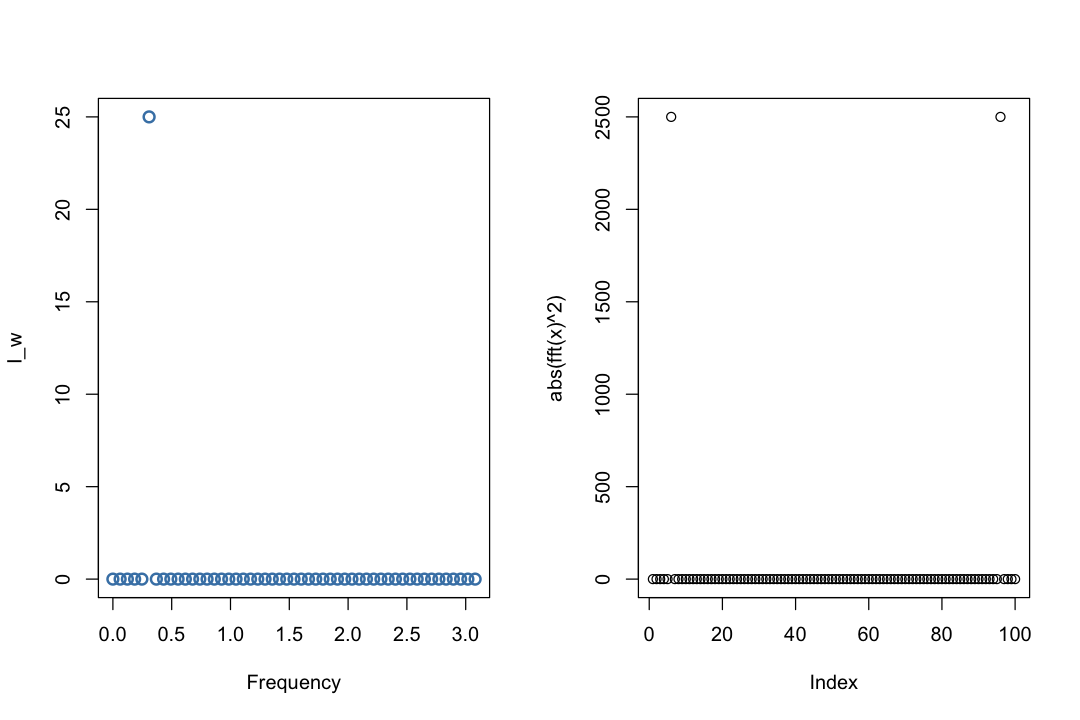

In [48]:
par(mfrow=c(1,2))
plot_periodogram_x(x) # just one half
plot(abs(fft(x)^2)) # whole periodogram

See which frequencies are equal to maximum value in periodogram:

In [18]:
which(max(periodogram_x(x)) == periodogram_x(x))-1

[1] 5

### Fourier tranform and reconstruction of a time series
Firstly, let's try if we get the same signal from the Inverse FT of FT.

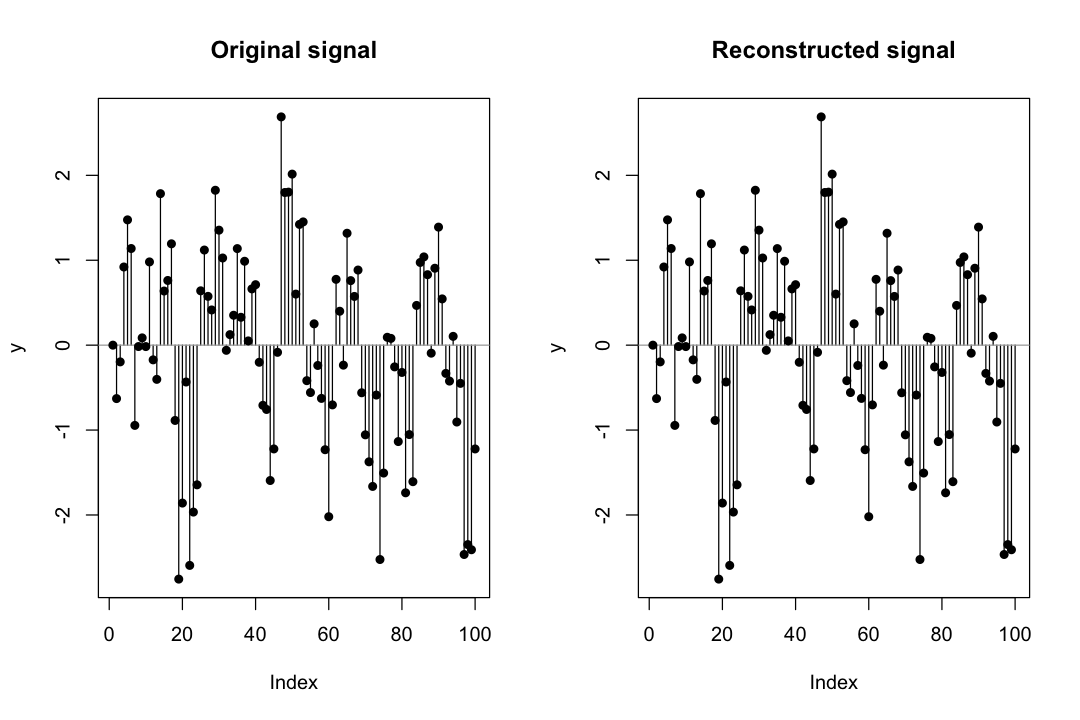

In [50]:
# yy <- cos(seq(0,4*pi,0.1))
yy <- ARone(100,0.7)
par(mfrow=c(1,2))
# Original signal
lolliplot(yy, name="Original signal")
G <- fft1(yy)
x <- fft1(G, inverse = TRUE)
# Reconstructed signal, real parts, imaginary parts = 0.000i
lolliplot(Re(x), name="Reconstructed signal")
# ?
#t(round(yy, digits=6)==round(x, digits=6))

#### Partial reconstruction
This is as example of the power we can rule when using the Fourier transform. We can filter out whatever frequency we like.

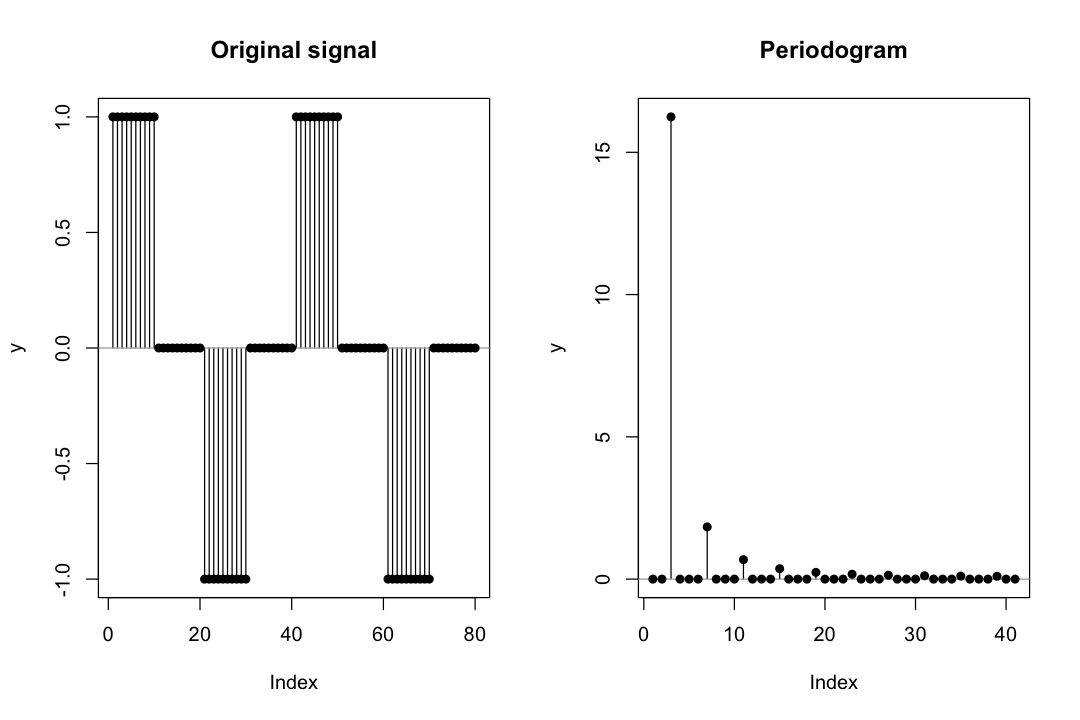

In [51]:
A <- 4
y1 <- c(rep(1,10),rep(0,10),rep(-1,10),rep(0,10),rep(1,10),rep(0,10),rep(-1,10),rep(0,10))
par(mfrow=c(1,2))
lolliplot(y1, name="Original signal")
SwY1 <- periodogram_x(y1)
lolliplot(SwY1, name="Periodogram")

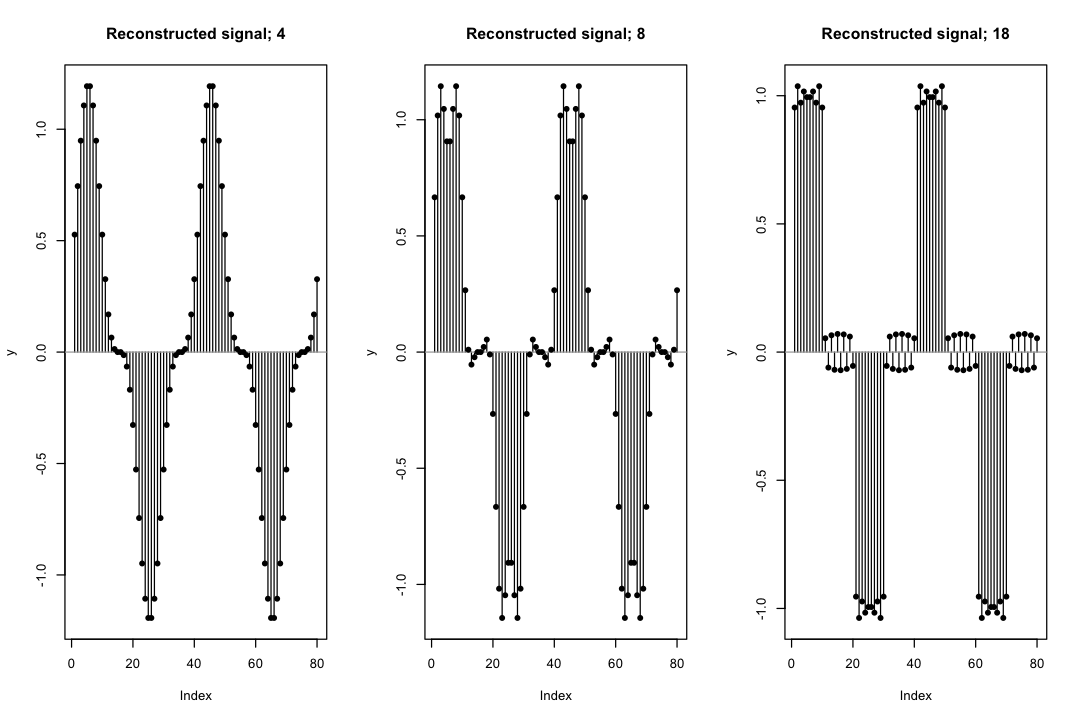

In [52]:
# Taking most significant parts of the series
par(mfrow=c(1,3))
Fy1 <- fft1(y1)
## 4 most significant
Fy1[(abs(Fy1) <= sort(abs(Fy1), TRUE)[5])] = 0
y1Reco <- Re(fft1(Fy1, inverse = TRUE))
lolliplot(y1Reco, name="Reconstructed signal; 4")
#####
Fy1 <- fft1(y1)
## 8 most significant
Fy1[(abs(Fy1) <= sort(abs(Fy1), TRUE)[9])] = 0
y1Reco <- Re(fft1(Fy1, inverse = TRUE))
lolliplot(y1Reco, name="Reconstructed signal; 8")
#####
Fy1 <- fft1(y1)
## 18 most significant
Fy1[(abs(Fy1) <= sort(abs(Fy1), TRUE)[19])] = 0
y1Reco <- Re(fft1(Fy1, inverse = TRUE))
lolliplot(y1Reco, name="Reconstructed signal; 18")

### Example: White noise process
where $\varepsilon_t$ is the **white noise** with properties:
$$ \gamma_0 = \sigma_\varepsilon^2, ~~\gamma_j =0,~~\text{ for } j>0$$
So, we know that the spectral density of a white noise is flat and equal to its variance.
$$ f(\omega) = \frac{\sigma_\varepsilon^2}{2\pi} $$

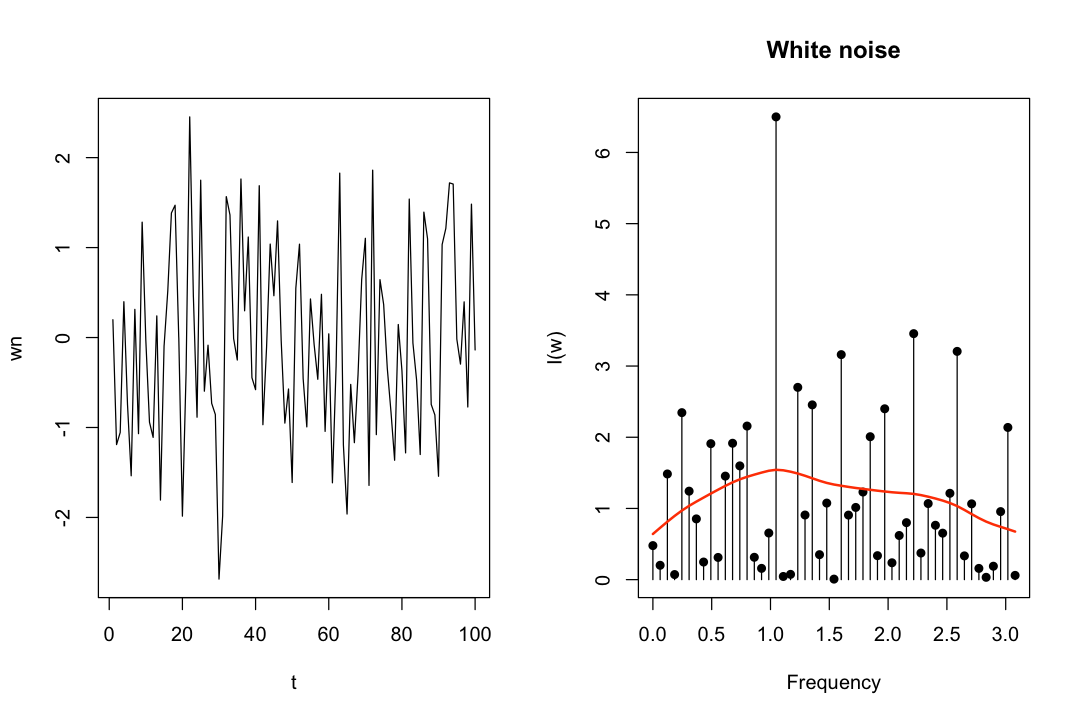

In [70]:
# White noise
wn <- rnorm(100)
pe <- periodogram_x(wn)
par(mfrow=c(1,2))
plot(wn, type="l", xlab="t")
plot(x = frequency_pi(pe), y=pe, type="h", xlab="Frequency", ylab="I(w)", main="White noise")
points(x = frequency_pi(pe), y=pe,, pch=16, main="Periodogram") # col="lightseagreen"
lines(smooth.spline(x = frequency_pi(pe), y=pe, df=6), col="OrangeRed", lwd=2)

#### An example of simulation of white noise

This example shows estimated variances of white noise.

We simulate white noises with variance 4, just see in plot the estimate arround 4 not arround 1.



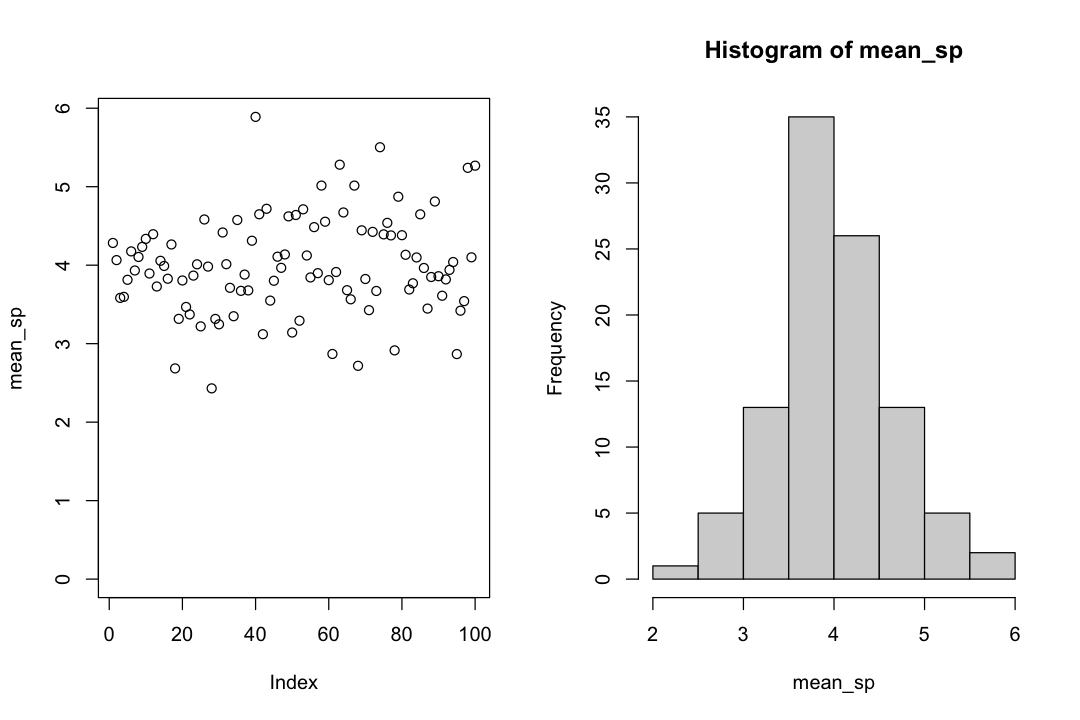

In [56]:
## Multiple white noises
nx <- 100
sp <- matrix(0, nx, nx)
for (i in 1:nx) {
    wn1 <- rnorm(nx, mean = 0, sd = 2) # sd is 2 => variance = 4
    sp[,i] = (1/nx) * abs(fft(wn1))^2 # complete periodogram = all frequencies, since we are going to sum it
}
mean_sp <- colSums(sp) / nx  # columns are individual estimated spectra of WNs, divided by its length, estiamted variances
par(mfrow = c(1,2))
plot(mean_sp, ylim = c(0, max(mean_sp)))
hist(mean_sp)

### Example: MA(1)

Let us consider a basic **MA(1)** process, 
$$y_t = \varepsilon_{t} + \theta \varepsilon_{t-1},$$ 
having following properties:

\begin{align}
\gamma_0 &= (1+\theta^2)\sigma^2,\\
\gamma_1 &= \theta \sigma^2,\\
\gamma_j &= 0,~~ j>1 \\
\end{align}

#### Spectral density of MA(1):
\begin{align}
f(\omega) &= \frac{\gamma(0)}{2\pi} + \frac{1}{\pi} \sum_{h=1}^{\infty} \gamma(h)\cos(h\omega) \\
f(\omega) &= \frac{\sigma^2}{2\pi}\left(1+\theta^2\right) + \frac{1}{\pi} (\theta \sigma^2 \cos(\omega))\\
&= \frac{\sigma^2}{2\pi}\left(1+\theta^2\ + 2\theta \cos(\omega)\right) \\
\end{align}

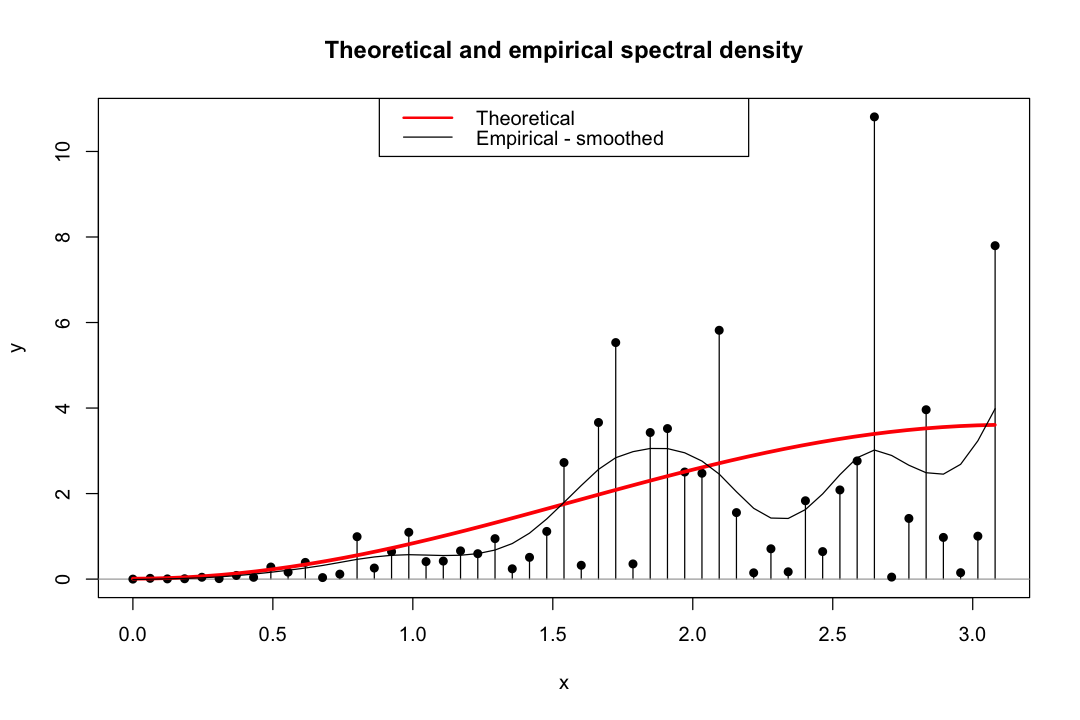

In [81]:
# MA(1)
par(mfrow = c(1, 1))
theta <- -0.9
T <- 100
w <- 2*pi * seq(0,T-1) / T
#theoSpec <- 1 + 2 * theta / (1 + theta^2) * cos(w[1:(T/2)])
theoSpec <- (1+theta^2+(2*theta*cos(w[1:(T/2)])))# just the formula above
y_ma <- MAone(T, theta)
pe <- periodogram_x(y_ma)
lolliplot(x = frequency_pi(pe), y=pe, name="Theoretical and empirical spectral density")
#lines(x = frequency_pi(theoSpec), y=theoSpec, lwd=2, col="OrangeRed")
lines(x = frequency_pi(theoSpec), y=theoSpec, col="red", lwd=3)
lines(smooth.spline(frequency_pi(pe), pe, df=10),lwd=1)
legend(x = "top",          # Position
       legend = c("Theoretical", "Empirical - smoothed"),  # Legend texts
       lty = c(1, 1),           # Line types
       col = c("red", "black"),           # Line colors
       lwd = c(2, 1))          

### Example AR(1)
Let us consider a basic **AR(1)** process, 
$$y_t = \phi y_{t-1} + \varepsilon_{t},$$ 
having the autocovariances:

\begin{align}
\gamma_0 &= \frac{\sigma^2}{1-\phi^2},\\
\gamma_h &= \frac{\sigma^2 \phi^{\vert h\vert}}{1-\phi^2} \\
\end{align}

#### Spectral density of AR(1):
\begin{align}
f(\omega) &= \frac{1}{2\pi}\sum_{h=-\infty}^{\infty} \gamma(h) e^{-i \omega h}  \\
&= \frac{\sigma^2}{2\pi(1-\phi^2)}\sum_{h=-\infty}^{\infty} \phi^{\vert h\vert}e^{-i\omega h} \\
&= \frac{\sigma^2}{2\pi(1-\phi^2)}\left( 1+ \sum_{h=1}^{\infty} \phi^h \left(e^{-i\omega h}+e^{i\omega h}\right) \right) \\
&= \frac{\sigma^2}{2\pi(1-\phi^2)}\left( 1 + \frac{\phi e^{-i\omega h}}{1-\phi e^{-i\omega h}} + \frac{\phi e^{i\omega h}}{1-\phi e^{i\omega h}} \right) \\
&= \frac{\sigma^2}{2\pi}\left(1 - 2\phi \cos(\omega) + \phi^2\right)^{-1} \\
\end{align}

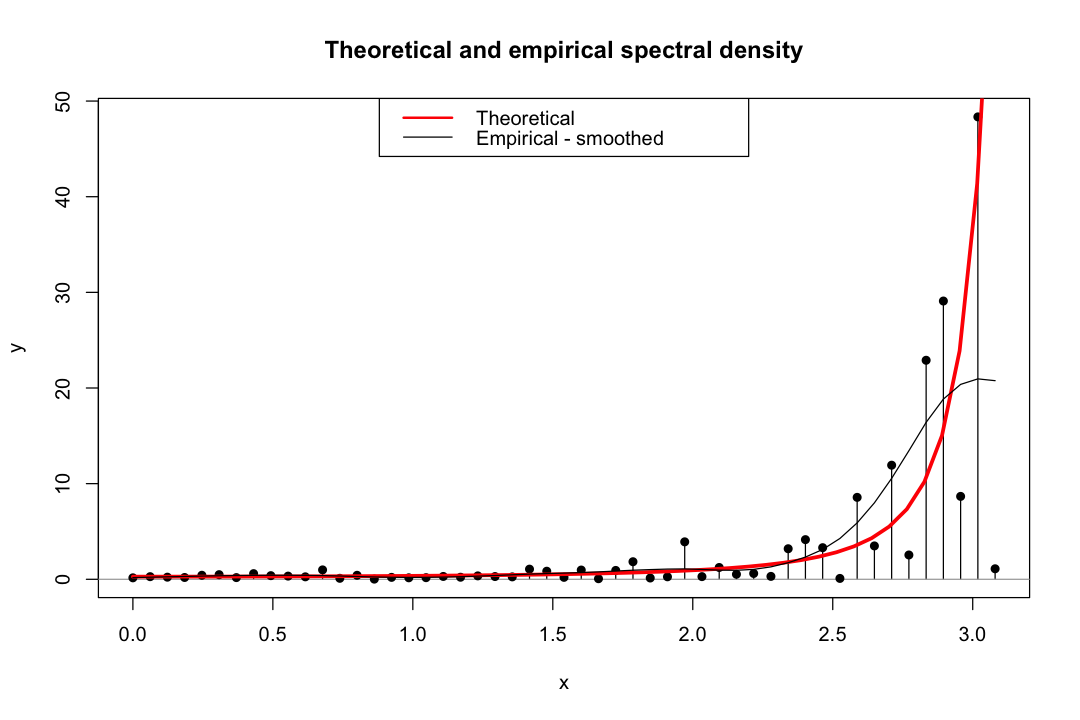

In [83]:
# Periodogram of AR(1)
# y_ar <- ARone(100,0.6)

# pe <- periodogram_x(y_ar)
# par(mfrow=c(1,2))
# plot(y_ar, type="l", xlab="t")
# lolliplot(x = frequency_pi(pe), y=pe, name="Theor. and empir spectral density")
# lines(smooth.spline(frequency_pi(pe), pe, df=10), col="OrangeRed", lwd=2)

# MA(1)
par(mfrow = c(1, 1))
phi <- -0.9
T <- 100
w <- 2*pi * seq(0,T-1) / T

theoSpec <- 1/(1+phi^2-(2*phi*cos(w[1:(T/2)])))# just the formula above
y_AR <- ARone(T, phi)
pe <- periodogram_x(y_AR)
lolliplot(x = frequency_pi(pe), y=pe, name="Theoretical and empirical spectral density")
lines(x = frequency_pi(theoSpec), y=theoSpec, col="red", lwd=3)
lines(smooth.spline(frequency_pi(pe), pe, df=10),lwd=1)
legend(x = "top",          # Position
       legend = c("Theoretical", "Empirical - smoothed"),  # Legend texts
       lty = c(1, 1),           # Line types
       col = c("red", "black"),           # Line colors
       lwd = c(2, 1)) 

## References
- Priestley, 1981,M. B. Spectral Analysis and Time Series: Univariate series.
- Shumway, R. H., & Stoffer, D. S. (2010). Time series analysis and its applications: with R examples. Springer Science & Business Media.
- Cochrane, J. H. (2005). Time series for macroeconomics and finance. Manuscript, University of Chicago.